<font size=7> Latencies Analysis

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [2]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact

In [3]:
with open('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/5-10-23s1-CutData.pkl', 'rb' ) as my_file:
    sd = pickle.load(my_file)

In [5]:
sttc_delta=20
sttc_cutoff = -1

print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")

all_pair_latencies = []
#pairs_late = [] #lags_late = []
count = 0
for pair in pairs:
    count += 1
    if count % 1000 == 0:
        print(count)
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=200)  #latency= np.median(pair_latencies)
    #if abs(np.median(pair_latencies))> latency_cutoff:
    #    pairs_late.append( pair )  #lags_late.append( latency )
    all_pair_latencies.append( pair_latencies )

10000 Starting Pairs
4950 pairs above sttc cutoff
1000
2000
3000
4000


In [6]:
#curated_latencies = []
curated_pairs = []
len_all_pair_latencies = []
for i in range(len(all_pair_latencies)):
    len_all_pair_latencies.append(len(all_pair_latencies[i]))
#curated_pairs.append( pairs[i] )

(array([2.037e+03, 1.081e+03, 3.470e+02, 2.050e+02, 1.280e+02, 9.100e+01,
        1.210e+02, 6.000e+01, 4.900e+01, 7.500e+01, 4.900e+01, 5.000e+01,
        7.300e+01, 5.200e+01, 5.200e+01, 2.500e+01, 2.500e+01, 1.600e+01,
        2.500e+01, 1.000e+01, 3.300e+01, 3.700e+01, 2.900e+01, 5.000e+01,
        2.900e+01, 1.800e+01, 4.100e+01, 3.400e+01, 8.000e+00, 0.000e+00,
        5.000e+00, 1.000e+01, 1.300e+01, 0.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 7.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 2.000e+0

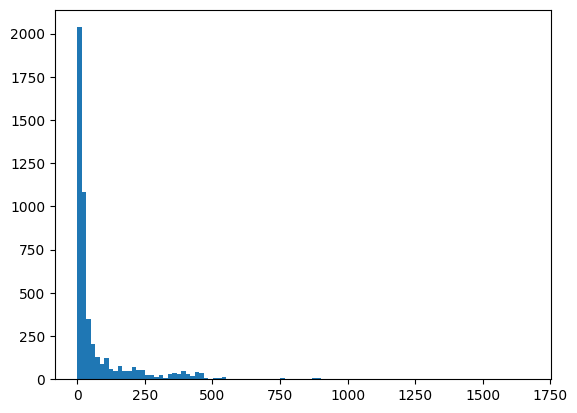

In [7]:
plt.hist(len_all_pair_latencies, bins=100)

In [13]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_pair_latencies)):
    pair_latencies = all_pair_latencies[i]
    if abs(np.mean(pair_latencies))> 15 and len(pair_latencies)>200: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( pairs[i] )  #lags_late.append( latency )
            curated_latencies.append( pair_latencies )
        else:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )
print(len(curated_latencies))
curated_pairs = np.array(curated_pairs)

1


/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


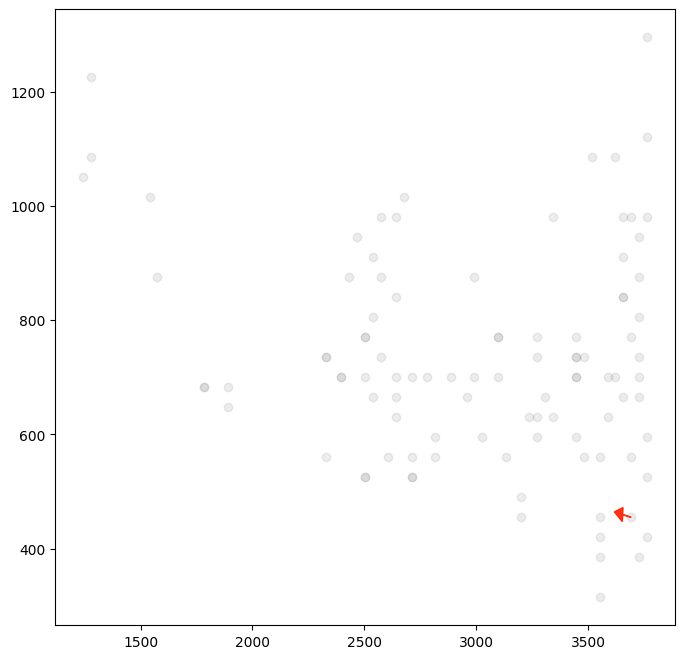

In [14]:
plot_vector_layout( sd, curated_pairs  )

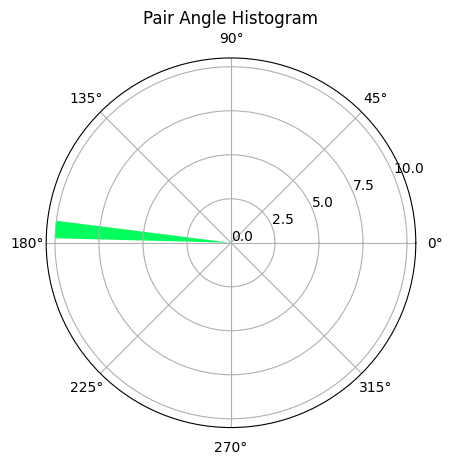

In [15]:
plot_latency_angle_hist( sd, curated_pairs, by_firing_rate=False)

In [16]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=15):
    @interact
    def plot_pair(pair = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair,0], pairs[pair,1], sd, ms_cutoff_high=200  )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)

In [17]:
pairs_hisogram( curated_pairs, sd, ms_cutoff_high=200)

interactive(children=(IntSlider(value=0, description='pair', max=0), Output()), _dom_classes=('widget-interact…